In [102]:
!pip install --upgrade pyswarm

Requirement already up-to-date: pyswarm in /usr/local/lib/python3.7/dist-packages (0.6)


### Import Libraries

In [103]:
# !pip install pyswarms

import pandas as pd # Data Management Framework
import numpy as np # Mathematical Computation
from matplotlib import pyplot as plt # Graphs
from sklearn.metrics import confusion_matrix, classification_report # Evalution Perameter
import seaborn as sns # Graph
%matplotlib inline
from sklearn.preprocessing import * # Data Preprocessing
from sklearn.model_selection import train_test_split # Training and testing Split 
import gc # Memory Management
import warnings # warnings ignore
warnings.filterwarnings('ignore')

# Natural Inspired Algorithms
from pyswarm import pso

# Deep learning Framework
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow
from tensorflow.keras import datasets, layers, models
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from google.colab import drive 
drive.mount('/content/drive')

tensorflow.random.set_seed(42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
import os
os.getcwd() 
os.chdir('/content/drive/MyDrive/pso/')
!pwd

/content/drive/MyDrive/pso


In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
!ls

 attack_type.csv
 CICIDS2017_New_Approach_PSO.ipynb
 CICIDS2017.rar
'Copy of CICIDS2017_New_Approach_PSO.ipynb'
'Field Names.csv'
 KDDTest.csv
 KDDTrain.csv
 model.png
 New_Approach_PSO.ipynb
'Nueral_Network_with_PSO_and_Keras_on_KDD (2).ipynb'
 Nueral_Network_with_PSO_and_Keras_on_KDD.ipynb


### Data Reading

In [107]:
### Read the dataset
cols = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes','dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level']

train = pd.read_csv("/content/drive/MyDrive/pso/KDDTrain.csv", names = cols)
test = pd.read_csv("/content/drive/MyDrive/pso/KDDTest.csv", names = cols)

In [108]:
# Train dataset display
print(f"Training dataset: {train.shape}")
train.head()

Training dataset: (125973, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [109]:
# Test dataset display
print(f"Testing dataset: {test.shape}")
test.head()

Testing dataset: (22543, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [110]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [111]:
%%time
# Drop the diffficulty level column
train.drop('difficulty_level', axis=1, inplace=True)
test.drop('difficulty_level', axis=1, inplace=True)
gc.collect()

CPU times: user 270 ms, sys: 32.5 ms, total: 303 ms
Wall time: 8.29 s


In [112]:
le = LabelEncoder()

# attack type
train["attack_type"] = le.fit_transform(train["attack_type"])
test["attack_type"] = le.fit_transform(test["attack_type"])

In [113]:
# protocol type
train["protocol_type"] = le.fit_transform(train["protocol_type"])
test["protocol_type"] = le.fit_transform(test["protocol_type"])

# service
train["service"] = le.fit_transform(train["service"])
test["service"] = le.fit_transform(test["service"])

# flag
train["flag"] = le.fit_transform(train["flag"])
test["flag"] = le.fit_transform(test["flag"])

In [114]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,1,20,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11
1,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11
2,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9
3,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11
4,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11


In [131]:
X = train.iloc[:, train.columns != 'attack_type'] # Features
y = train['attack_type'].values # Target Variable

In [132]:
print(sorted(train["attack_type"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


In [133]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100778, 41)
(25195, 41)
(100778,)
(25195,)


In [135]:
# scale the data to improve the performance   
scaler = StandardScaler()

# then we call the transform method to scale both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [136]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100778, 41)
(25195, 41)
(100778,)
(25195,)


In [137]:
print("Rows :", X_train.shape[0], "Columns :" , X_train.shape[1])

Rows : 100778 Columns : 41


In [138]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100778, 41, 1) (100778,)
(25195, 41, 1) (25195,)


## Model Design

In [139]:
#used when model won't get improve then execution will stop( to Halt the Training of Neural Networks At the Right Time)
# patience: Number of epochs with no improvement after which training will be stopped, monitor: Quantity to be monitored, to discover the training epoch on which training was stopped, 
# the “verbose” argument can be set to 1
EarlyStopper = EarlyStopping(patience=4, monitor='val_loss', mode='min')

In [147]:
model = Sequential()
model.add(layers.LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(layers.Flatten())
model.add(layers.Dense(23, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 41, 50)            10400     
_________________________________________________________________
flatten_6 (Flatten)          (None, 2050)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 23)                47173     
Total params: 57,573
Trainable params: 57,573
Non-trainable params: 0
_________________________________________________________________


In [148]:
#@title Neural Network Code commented
# input_dim = X_train.shape[1]
# model = Sequential()
# # input layer=41, hidden layer=128, 64, output layer=23
# # relu: to manage non-linear data, softmax=to get probablity
# model.add(layers.Dense(128, input_dim=input_dim, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(23, activation='softmax'))

# # to improve performance. Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
# opt = keras.optimizers.Adam(learning_rate=0.001)

# model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
# print(model.summary())

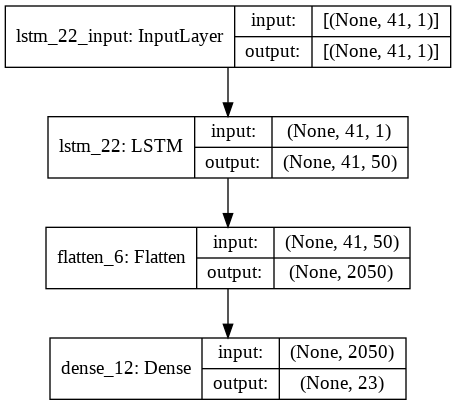

In [149]:
keras.utils.plot_model(model, show_shapes=True,  show_layer_names=True)

In [150]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1,validation_data=(X_test, y_test), callbacks=[EarlyStopper])

Epoch 1/20
3150/3150 [==============================] - 38s 12ms/step - loss: 0.1198 - accuracy: 0.9684 - val_loss: 0.0622 - val_accuracy: 0.9815
Epoch 2/20
3150/3150 [==============================] - 36s 11ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0491 - val_accuracy: 0.9861
Epoch 3/20
3150/3150 [==============================] - 36s 11ms/step - loss: 0.0338 - accuracy: 0.9895 - val_loss: 0.0353 - val_accuracy: 0.9912
Epoch 4/20
3150/3150 [==============================] - 36s 11ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0362 - val_accuracy: 0.9896
Epoch 5/20
3150/3150 [==============================] - 36s 11ms/step - loss: 0.0248 - accuracy: 0.9924 - val_loss: 0.0324 - val_accuracy: 0.9908
Epoch 6/20
3150/3150 [==============================] - 35s 11ms/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.0299 - val_accuracy: 0.9920
Epoch 7/20
3150/3150 [==============================] - 36s 11ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0276 -

In [151]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train_Accuracy:{train_acc} Train Loss: {train_loss}")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy:{test_acc} Test Loss: {test_loss}")
y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)

Train_Accuracy:0.9965171217918396 Train Loss: 0.010684876702725887
Test Accuracy:0.9942448735237122 Test Loss: 0.023549742996692657


In [153]:
print(y_pred)
print(y_test)

[11  9  9 ... 11 11  9]
[11  9  9 ... 11 11  9]


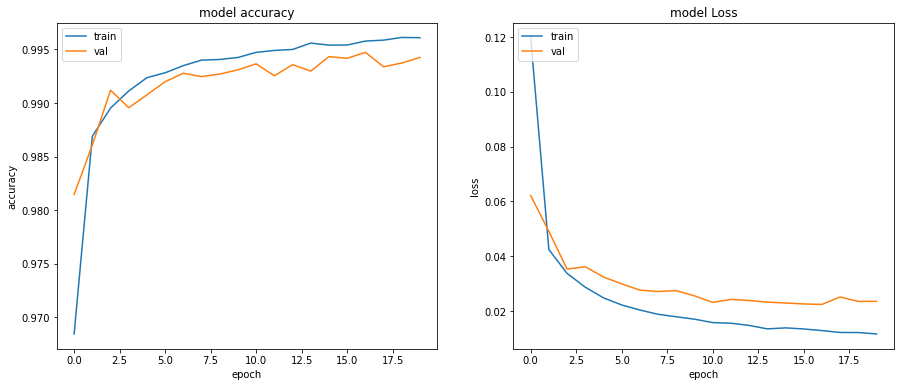

Classification Report:


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       185
           1       1.00      0.22      0.36         9
           3       1.00      0.91      0.95        11
           4       0.25      1.00      0.40         1
           5       0.98      0.98      0.98       733
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00      8228
          10       0.99      0.91      0.95       313
          11       0.99      1.00      1.00     13422
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.93      0.96        43
          15       1.00      1.00      1.00       573
          16       0.00      0.00      0.00         1
          17       0.99      0.97      0.98       738
  

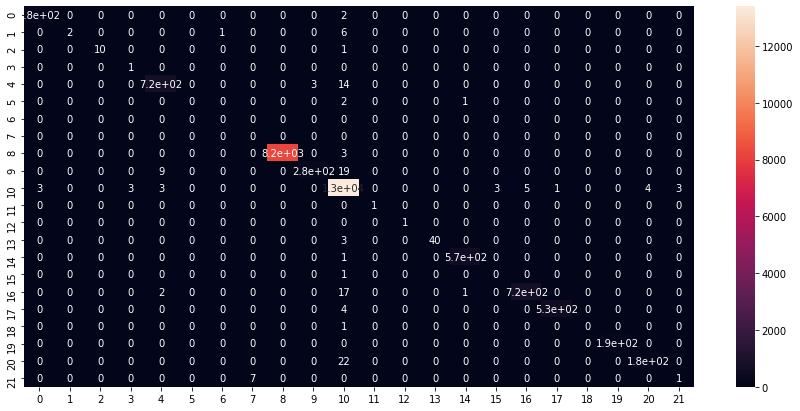

In [155]:
# Plot the graph accuracy: a ratio of correctly predicted observation to the total observations, Precision is the ratio of 
# correctly predicted positive observations to the total predicted positive observations. High precision relates to the low false positive rate. 
# Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
# F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, 
# but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. 
# Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.
plt.figure(figsize = (15,6))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# predict probabilities for test set

Target_names = ['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 
                'imap', 'ipsweep', 'land', 'loadmodule', 'multihop',
                'neptune', 'nmap', 'normal', 'perl', 'phf', 
                'pod', 'portsweep', 'rootkit', 'satan', 'smurf', 
                'spy', 'teardrop', 'warezclient', 'warezmaster']
print("Classification Report:\n")
print()
print(classification_report(y_test, y_pred))
# confusion matrix
print("Confusion Matrix:\n")
print()
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (15,7) )
sns.heatmap(matrix, annot=True)
plt.show()

### PSO with NN

In [180]:
#fine_tuning,nnunits,dropout,learning_rate
lb=[49,0.01]
ub=[50,0.02]

In [181]:
from tensorflow.keras import backend as K

def model_design(x): 
  
  print(f"Units : {int(x[0])}, Learning Rate : {x[1]:.2f}")
  K.clear_session()
  input_dim = X_train.shape[1]

  model = Sequential()
  model.add(layers.LSTM(int(x[0]), return_sequences=True, input_shape = (X_train.shape[1], 1)))
  model.add(layers.Flatten())
  model.add(layers.Dense(23, activation='softmax'))

  if x[1]< 0.003:
    learning_rate = 0.001
  elif x[1]< 0.0075:
    learning_rate = 0.005
  elif x[1]< 0.015:
    learning_rate = 0.01
  elif x[1]< 0.035:
    learning_rate = 0.02
  elif x[1]< 0.075:
    learning_rate = 0.05
  elif x[1]< 0.125:
    learning_rate = 0.1
  elif x[1]< 0.175:
    learning_rate = 0.15
  else:
    learning_rate = 0.2

  opt = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
  return model

In [182]:
EarlyStopper = EarlyStopping(patience=4, monitor='val_loss', mode='min')
count = 0

In [183]:
def best_model(x):
  model = model_design(x)
  
  history = model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=1, validation_data=(X_test, y_test),callbacks=[EarlyStopper], workers=8, use_multiprocessing=True)
  
  train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
  print(f"Train_Accuracy:{train_acc} Train Loss: {train_loss}")
  
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
  print(f"Test Accuracy:{test_acc} Test Loss: {test_loss}")


  if test_acc > 0.987:
    # Plot the graph
    plt.figure(figsize = (15,6))
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(np.argmax(history.history["val_accuracy"]), np.max(history.history["val_accuracy"]), marker="x", color="r", label="best model")
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
    plt.title('model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # predict probabilities for test set
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
  
    print(classification_report(y_test, y_pred))
    # confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (15,7) )
    sns.heatmap(matrix, annot=True)
    plt.show()
    global count
    count = count+1
    model.save(f"model-{count}-{round(test_acc, 3)}-{round(test_loss, 3)}")
    np.savetxt(f"data-{count}.csv", x, delimiter=',')

  return test_loss

In [ ]:
xopt, fopt = pso(best_model, lb, ub)
print ("Best position"+str(xopt))
print ("Loss:" + str(fopt))

Units : 49, Learning Rate : 0.02
Epoch 1/2
3150/3150 [==============================] - 38s 12ms/step - loss: 0.1179 - accuracy: 0.9689 - val_loss: 0.0584 - val_accuracy: 0.9836
Epoch 2/2
3150/3150 [==============================] - 36s 11ms/step - loss: 0.0418 - accuracy: 0.9874 - val_loss: 0.0503 - val_accuracy: 0.9859
Train_Accuracy:0.9885391592979431 Train Loss: 0.038839783519506454
Test Accuracy:0.9858702421188354 Test Loss: 0.05032128468155861
Units : 49, Learning Rate : 0.02
Epoch 1/2
3150/3150 [==============================] - 38s 11ms/step - loss: 0.1158 - accuracy: 0.9700 - val_loss: 0.0637 - val_accuracy: 0.9826
Epoch 2/2
3150/3150 [==============================] - 36s 11ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0498 - val_accuracy: 0.9865
Train_Accuracy:0.9888368248939514 Train Loss: 0.03834116458892822
Test Accuracy:0.9865449666976929 Test Loss: 0.04978514090180397
Units : 49, Learning Rate : 0.01
Epoch 1/2
3150/3150 [==============================] - 114s 